In [2]:
print('test')

test


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.arange(1, 11)

# plt.title("Graphing some lines")
# plt.xlabel(r"$x$")
# plt.ylabel(r"$y$")

# y = 4 * x
# plt.plot(x, y, color="blue")

# y = 4 * x + 5
# plt.plot(x, y, color="green")

# y = 4 * x - 5
# plt.plot(x, y, color="orange")

# y = 3/2 * x + 20
# plt.plot(x, y, color="red")

# y = 5/2 * x + 30
# plt.plot(x, y, color="magenta")

# y = -5/2 * x + 30
# plt.plot(x, y, color="gray")

# y = -1/2 * x + 50
# plt.plot(x, y, color="gold")

# plt.legend([
#   r'$y = 4x$',
#   r'$y = 4x + 5$',
#   r'$y = 4x - 5$',
#   r'$y = \frac{3}{2}x + 20$',
#   r'$y = \frac{5}{2}x + 30$',
#   r'$y = -\frac{5}{2}x + 30$',
#   r'$y = -\frac{1}{2}x + 50$',
# ], loc="lower right")

# plt.savefig('lines.jpg')

In [4]:
house_prices = np.array([
  [0.2, 0.2],
  [1, 1.8],
  [2, 4],
  [3, 7],
  [4, 9],
  [5, 11],
  [7, 12],
  [10, 13],
  [9, 14]
])

x = house_prices[:, [0]]
y = house_prices[:, [1]]

'xs', x, 'ys', y

('xs',
 array([[ 0.2],
        [ 1. ],
        [ 2. ],
        [ 3. ],
        [ 4. ],
        [ 5. ],
        [ 7. ],
        [10. ],
        [ 9. ]]),
 'ys',
 array([[ 0.2],
        [ 1.8],
        [ 4. ],
        [ 7. ],
        [ 9. ],
        [11. ],
        [12. ],
        [13. ],
        [14. ]]))

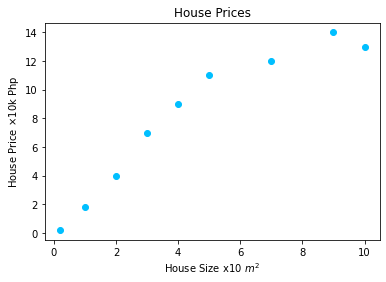

In [5]:
guess_x = np.arange(0, 11)
bad_guess = 0.5 * guess_x + 0.5
better_guess = 0.7 * guess_x + 0.92
almost_there_guess = 0.98 * guess_x + 1.2
best_guess = 1.5 * guess_x + 1.3
another_bad = 2.85 * guess_x + 2.83

plt.title('House Prices')
plt.xlabel(r'House Size x10 $m^2$')
plt.ylabel(r'House Price $\times$10k Php')
plt.plot(x, y, 'o', color='deepskyblue')

# plt.plot(guess_x, bad_guess, color="red", label=r"$w_1 = 0.5, w_0 = 0.5$")
# plt.plot(guess_x, better_guess, color="darkorange", label=r"$w_1 = 0.7, w_0 = 0.92$")
# plt.plot(guess_x, almost_there_guess, color="gold", label=r"$w_1 = 0.98, w_0 = 1.2$")
# plt.plot(guess_x, best_guess, color="green", label=r"$w_1 = 1.5, w_0 = 1.3$")
# plt.plot(guess_x, another_bad, color="sienna", label=r"$w_1 = 2.85, w_0 = 2.83$")
# plt.legend()
plt.savefig('idea-pre.jpg')

In [6]:
def add_ones(X):
    return np.insert(X, 0, 1, axis=1)

X_with_bias = add_ones(x)

def cost(X, y, theta):
    m = X.shape[0]
    return (1 / (2 * m)) * (X @ theta - y).T @ (X @ theta - y)
  

In [7]:
theta = np.array([
  [0.5],
  [0.5]
])

cost(X_with_bias, y, theta)

array([[18.86388889]])

In [8]:
theta = np.array([
  [0.7],
  [0.92]
])

cost(X_with_bias, y, theta)

array([[7.07932533]])

In [9]:
theta = np.array([
  [0.98],
  [1.2]
])

cost(X_with_bias, y, theta)

array([[2.54153333]])

In [10]:
theta = np.array([
  [1.5],
  [1.3]
])

cost(X_with_bias, y, theta)

array([[1.39686667]])

In [11]:
def partial_derivative(X, y, theta):
    m = X.shape[0]
    return (1 / m) * X.T @ (X @ theta - y)

In [12]:
def gradient_descent(X, y, initial_theta):
    theta = initial_theta
    alpha = 0.005
    cost_history = []
    theta_1_history = []

    for i in range(500):
        theta -= alpha * partial_derivative(X_with_bias, y, theta)
        cost_for_this_theta = cost(X_with_bias, y, theta).item()
        cost_history.append(cost_for_this_theta)
        theta_1_history.append(theta[1].item())

    return (theta, cost_history, theta_1_history)
    

In [13]:
theta, cost_history, theta_1_history = gradient_descent(
  X_with_bias, 
  y, 
  np.array([
    [0.0],
    [0.0]
  ])
)
theta, cost_history_2, theta_1_history_2 = gradient_descent(
  X_with_bias, 
  y, 
  np.array([
    [2.85],
    [2.83],
  ])
)

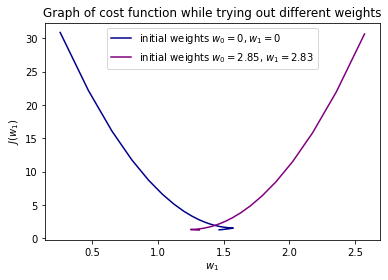

In [14]:
plt.title('Graph of cost function while trying out different weights')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$J(w_1)$')
plt.plot(theta_1_history, cost_history, color="darkblue", label=r"initial weights $w_0 = 0, w_1 = 0$")
plt.plot(theta_1_history_2, cost_history_2, color="purple", label=r"initial weights $w_0 = 2.85$, $w_1 = 2.83$")
plt.legend()
plt.savefig('graph-cost.jpg')

In [15]:
theta

array([[2.11334589],
       [1.31420133]])

In [16]:
x_unseen = add_ones(np.array([
  [8],
  [12]
]))

x_unseen @ theta

array([[12.62695656],
       [17.8837619 ]])